# 期末作业
姓名：王兴未   学号：2018302020138   班级：18级3班

*期末作业要求有摘要和结论，所研究问题要有自己的讨论，要展现出你们的工作量！*

## 基于level set及动态轮廓模型的图像分割算法

**摘要：** 

本文探讨了一种基于水平集及动态轮廓模型的图像分割算法。主要分为两步：水平集函数的初始化（及符号距离函数的计算），及水平集函数的演化。

**正文：**

## 算法综述

对于一条曲线，可以利用更高维度的曲面在低维度上的某一投影来代替；这条曲线的演化也可以通过更高维度的曲面的演化来描述。这一方法被称为水平集（level set）。水平集方法自1987年被Osher及Sethian两位教授提出后，得到了广泛应用，包括但不限于曲线演化，图像分割等方面。本文即利用水平集方法尝试进行图像分割的处理。

同时，活动轮廓模型是广泛应用于图像分割中的一种手段。这种方法先假设一条轮廓线，随后通过能量最小或熵最大等原理来演化并确定最终的图像轮廓。

目前常见的活动轮廓模型有两类，一类是snake参数活动轮廓模型，其最基本思想是求解能量函数的最小值。第一个能量参数在1987年由Kass教授提出：
$$E = \int_0^1 \left [ E_{int}(X(s)) + E_{ext}(X(s)) \right ]ds$$
其中s为弧长参数。


另一类则是几何活动轮廓模型，它通过计算水平集的拓扑变化来描述曲线的变化，而水平集的演化满足Hamilton-Jacobi偏微分方程：
$$\frac{\partial \phi}{\partial t} = F |\nabla \phi|$$
其中F是与法线方向速度有关的参数，由不同的模型可取为不同的模型。这一偏微分方程最终可用Upwind算法及有限差分算法化为下文的离散形式。

这种方法需要在每次演化后都将水平集重新初始化为符号距离函数SDF，导致其计算量较大。后来Sethian教授又提出一种Fast Marching Method方法，能较快的对SDF进行计算。本文即采用了该方法。

## 具体实现

设$(x_i, y_i) = (ih, jh)$为格点坐标，h为二维网格步长。则$\phi_{i,j}^n = \phi(n\Delta t, x_i, y_i)$是对水平集函数在网格上的近似。$\phi^0 = \phi_0$

### 水平集函数的初始化

水平集函数初始化为符号距离函数SDF，即：

$$\phi_0(P) = S(P)D(P)$$

具体求法见下。而所取的初始曲线是任意的，不妨取为一条矩形线。

### 水平集函数的迭代

经过艰苦卓绝的数学运算，我们得到Mumford-Shah分割模型中偏微分方程的离散表达式：

$$\phi_{i,j}^{n+1} = \phi_{i,j}^n + \Delta t \left [ max(F_{m-s}, 0)\nabla^+ + min(F_{m-s}, 0)\nabla^- + \mu K_{i,j}\left ((D_{i,j}^{0y})^2 + (D_{i,j}^{0x})^2\right )^{1/2} \right]$$

式中：

$$\nabla^+ = \left [ max(D_{i,j}^{-x}, 0)^2 + min(D_{i,j}^{+x}, 0)^2 + max(D_{i,j}^{-y}, 0)^2 + min(D_{i,j}^{+y}, 0)^2 \right ]^{1/2}$$
$$\nabla^- = \left [ min(D_{i,j}^{-x}, 0)^2 + max(D_{i,j}^{+x}, 0)^2 + min(D_{i,j}^{-y}, 0)^2 + max(D_{i,j}^{+y}, 0)^2 \right ]^{1/2}$$

$$D_{i,j}^{-x} = \phi_{i,j} - \phi_{i-1, j}$$
$$D_{i,j}^{+x} = \phi_{i+1,j} - \phi_{i, j}$$
$$D_{i,j}^{0x} = (\phi_{i+1,j} - \phi_{i-1, j})/2$$

$$D_{i,j}^{-y} = \phi_{i,j} - \phi_{i, j-1}$$
$$D_{i,j}^{+y} = \phi_{i,j+1} - \phi_{i, j}$$
$$D_{i,j}^{0y} = (\phi_{i,j+1} - \phi_{i, j-1})/2$$

而$K_{i,j}$是水平集函数在$(i,j)$的曲率，由下式定义：

$$K = \nabla \cdot \frac{\nabla \phi}{|\nabla \phi|} = \frac{\phi_{xx}\phi^2_y - 2 \phi_{xy}\phi_x\phi_y + \phi_{yy}\phi^2_x}{(\phi_x^2 + \phi_y^2)^{3/2}}$$

可由中点差分$D_{i,j}^{0x}$,$D_{i,j}^{0y}$近似计算出来

$F_{m-s}$由Mumford-Shah分割模型定义如下：

$$F_{m-s}(x,y) = -v - \lambda_o(I(x,y) - c_o)^2 + \lambda_b(I(x,y) - c_b)^2$$

$v, \lambda_o, \lambda_b$及前文的$\mu$均为常数，$I(x,y)$为图像在(x,y)点的平均灰度，$c_o,c_b$分别为C的内部与外部的平均灰度

### 水平集函数的再次初始化

在每一次迭代水平集函数后，需重新将水平集函数初始化为符号距离函数SDF。在闭曲线C内为正，外为负，其值为点到曲线C的最近距离。即：

$$\phi_0(P) = S(P)D(P)$$

#### 判断符号

可通过求解关于T的方程及利用快速步进法(Fast Marching Method)来判断：

$$\left [ max(D_{i,j}^{-x}T, 0)^2 + min(D_{i,j}^{+x}T, 0)^2 + max(D_{i,j}^{-y}T, 0)^2 + min(D_{i,j}^{+y}T, 0)^2 \right ]^{1/2} = 1$$

(1)创建一个二维数组T。记$C_0$上所有点T = +无穷（实现中可取为+100000之类的大数），并标记网格点为Accepted.

取一种子点$P_{seed}$记T = 0，并记为Accepted。将其周围的窄带（此处取宽度为1，即仅为周围的邻点）的T = 1， 记为Trial，并存入另外一数组Heap中（实际上此处应为二叉树，但是我不会写所以用数组来代替）。其他点T = -无穷，记为Faraway.

(2)从Heap中找出最小值点，标记为Accepted并从Heap中除去，随后将其窄带内的点记为Trial并用计算得到的T进行更新。如此循环至Heap中无其他点。

(3)所有T>=0的点记为+1，其他的点记为-1,得到S(P)

#### 求解距离

(1)寻找距离曲线$C_0$最近的点（0 < d <= 1)，计算这些点到曲线的准确距离，同时计算曲线上离这些点最近的点（源点）。分别储存在数组中。将曲线上的点及这些点标记为Visited，其余点标记为Unvisited.

(2)分别以四个扫描方向扫描整个网络E，对于Unvisited的点P，计算其到邻接的四个点$P_l$的源点$P_l^*$的距离$u_l^{tmp}$（如果有的点也还是Unvisited，则跳过该点；全部都是Unvisited则略过此点。）如果$u_l^{tmp} < minu(P_l)$,则记为正无穷。随后，取$u(P) = minu_l^{tmp}=u_\lambda^{tmp}$,并记P的源点为$P_\lambda^*$

(3)经过四次扫描后，即可得到所有点的距离，记为D(P)

### 得到SDF

将符号函数与距离函数相乘，即可得到符号函数，作为水平集的初始化。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.optimize as scp

#segment should be devided.
def average_grey(segment):
    return np.mean(segemnt)

from mayavi import mlab
mlab.init_notebook()

Notebook initialized with ipy backend.


(768, 1024)


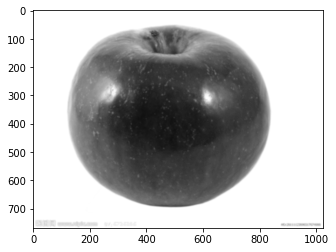

In [2]:
image_path = r"C:\Users\nirvanaxiao6\Desktop\apple1.jpg"
img = cv2.imread(image_path, 0)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
print(img.shape)

In [3]:
def signal(shape, C_list):
    pixel = np.ones(shape)
    sign = np.ones(shape)
    for coor in C_list:
        pixel[coor] = 0
    up = 0
    down = 0
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            if(pixel[(i,j)] == 0):
                sign[(i,j)] = 0
            else:
                if(pixel[(i,j-1)] == 1):
                    sign[(i,j)] = sign[(i, j - 1)]
                else:
                    if(pixel[(i-1, j-2)] == 0 or pixel[(i-1, j)] == 0 or pixel[(i-1, j-1)] == 0):
                        up = 1
                    else:
                        up = 0

                    if(pixel[(i+1, j-1)]== 0 or pixel[(i+1, j)] == 0 or pixel[(i+1, j-2)] == 0):
                        down = 1
                    else:
                        down = 0
                    for k in range(1, j):
                        if(pixel[(i, j - k)] != 0):
                            if(up * down == 1):
                                sign[(i,j)] = -sign[(i, j - k)]
                                break
                            else:
                                sign[(i,j)] = sign[(i, j - k)]
                                break
                        else:
                            pass
    return sign

In [124]:
def dist_cal(coor1, coor2):
    dist = np.sqrt((coor1[0] - coor2[0]) ** 2 + (coor1[1] - coor2[1]) ** 2)
    return dist

def band(coor):
    if(coor[1] == 0 and coor[0] == 0):
        return[(coor[0] + 1, coor[1]), (coor[0], coor[1] + 1)]
    elif(coor[0] == img.shape[0] - 1 and coor[1] == img.shape[1] - 1):
        return[(coor[0] - 1, coor[1]), (coor[0], coor[1] - 1)]
    elif(coor[0] == 0 and coor[1] == img.shape[1] - 1):
        return[(coor[0] + 1, coor[1]), (coor[0], coor[1] - 1)]
    elif(coor[0] == img.shape[0] - 1 and coor[1] == 0):
        return[(coor[0] - 1, coor[1]), (coor[0], coor[1] + 1)]
    elif(coor[0] == 0):
        return[(coor[0] + 1, coor[1]), (coor[0], coor[1] + 1), (coor[0], coor[1] - 1)]
    elif(coor[0] == img.shape[0] - 1):
        return[(coor[0] - 1, coor[1]), (coor[0], coor[1] + 1), (coor[0], coor[1] - 1)]
    elif(coor[1] == 0):
        return[(coor[0] + 1, coor[1]), (coor[0] - 1, coor[1]), (coor[0], coor[1] + 1)]
    elif(coor[1] == img.shape[1] - 1):
        return[(coor[0] + 1, coor[1]), (coor[0] - 1, coor[1]), (coor[0], coor[1] - 1)]

    else:
        return[(coor[0] + 1, coor[1]), (coor[0] - 1, coor[1]), (coor[0], coor[1] + 1), (coor[0], coor[1] - 1)]

def distance(shape, C_list):
    dist = np.full(shape, 1e9)
    source = np.zeros(shape, dtype=tuple)
    visited = np.zeros(shape)
    for coor in C_list:
        dist[coor] = 0
        visited[coor] = 1
        source[coor] = coor
    for coor in C_list:
        for point in band(coor):
            visited[point] = 1
            dist[point] = 1
            source[point] = coor
    count = 0
    count1 = 0
    count2 = 0
    count3 = 0
    #四个方向的循环
    list_for_i = np.arange(shape[0])
    list_for_j = np.arange(shape[1])
    for i in list_for_i:
        for j in list_for_j:
            count1 += 1
            if(visited[(i,j)] == 1):
                continue
            dis = []
            p_dis = []
            point_list = band((i,j))
            for point in point_list:
                if(source[point] == 0):
                    count2 += 1
                    continue
                else:
                    p_dis.append(dist[point])
                    dis.append(dist_cal((i,j), source[point]))
            if(len(p_dis) == 0):
                count3 += 1
                continue
            for k in range(len(dis)):
                if(dis[k] < np.min(p_dis)):
                    dis[k] = 1e10
            dist[(i,j)] = np.min(dis)
            source[(i,j)] = source[point_list[np.where(dis == np.min(dis))[0][0]]]
            count += 1
    print(count)
    print(count1)
    print(count2)
    print(count3)
    count = 0
    count1 = 0
    count2 = 0
    count3 = 0
    for i in list_for_i[::-1]:
        for j in list_for_j:
            count1 += 1
            if(visited[(i,j)] == 1):
                continue
            dis = []
            p_dis = []
            point_list = band((i,j))
            for point in point_list:
                if(visited[point] == 0):
                    count2 += 1
                    continue
                else:
                    p_dis.append(dist[point])
                    dis.append(dist_cal((i,j), source[point]))
            if(len(p_dis) == 0):
                count3 += 1
                continue
            for k in range(len(dis)):
                if(dis[k] < np.min(p_dis)):
                    dis[k] = 1e10
            dist[(i,j)] = np.min(dis)
            source[(i,j)] = source[point_list[np.where(dis == np.min(dis))[0][0]]]
            count += 1
    print(count)
    print(count1)
    print(count2)
    print(count3)
    count = 0
    count1 = 0
    count2 = 0
    count3 = 0
    for i in list_for_i:
        for j in list_for_j[::-1]:
            count1 += 1
            if(visited[(i,j)] == 1):
                continue
            dis = []
            p_dis = []
            point_list = band((i,j))
            for point in point_list:
                if(visited[point] == 0):
                    count2 += 1
                    continue
                else:
                    p_dis.append(dist[point])
                    dis.append(dist_cal((i,j), source[point]))
            if(len(p_dis) == 0):
                count3 += 1
                continue
            for k in range(len(dis)):
                if(dis[k] < np.min(p_dis)):
                    dis[k] = 1e10
            dist[(i,j)] = np.min(dis)
            source[(i,j)] = source[point_list[np.where(dis == np.min(dis))[0][0]]]
            count += 1
    print(count)
    print(count1)
    print(count2)
    print(count3)
    count = 0
    count1 = 0
    count2 = 0
    count3 = 0
    for i in list_for_i[::-1]:
        for j in list_for_j[::-1]:
            count1 += 1
            if(visited[(i,j)] == 1):
                continue
            dis = []
            p_dis = []
            point_list = band((i,j))
            for point in point_list:
                if(visited[point] == 0):
                    count2 += 1
                    continue
                else:
                    p_dis.append(dist[point])
                    dis.append(dist_cal((i,j), source[point]))
            if(len(p_dis) == 0):
                count3 += 1
                continue
            for k in range(len(dis)):
                if(dis[k] < np.min(p_dis)):
                    dis[k] = 1e10
            dist[(i,j)] = np.min(dis)
            source[(i,j)] = source[point_list[np.where(dis == np.min(dis))[0][0]]]
            count += 1
    print(count)
    print(count1)
    print(count2)
    print(count3)
    count = 0
    count1 = 0
    count2 = 0
    count3 = 0
    return dist
            

In [ ]:
init_curve = [] #filling with tuple

for j in range(int(img.shape[1] / 4), int(img.shape[1] * 3/ 4)):
    init_curve.append((int(img.shape[0] / 4), j))
    init_curve.append((int(img.shape[0] * 3 / 4), j))
for i in range(int(img.shape[0] / 4), int(img.shape[0] * 3/ 4)):
    init_curve.append((i, int(img.shape[1] / 4)))
    init_curve.append((i, int(img.shape[1] * 3 / 4)))
    
dist = distance(img.shape, init_curve)

3579
786432
3116056
777483


In [78]:
mlab.clf()
mlab.surf(dist, warp_scale = 'auto')
mlab.axes()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

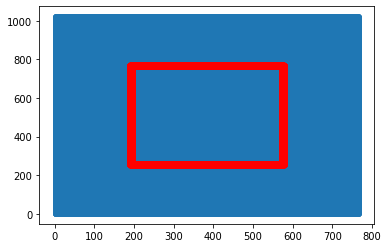

[256 257 258 ... 765 766 767]


In [96]:
np.min(dist)
np.where(dist == np.max(dist))
plt.plot(np.where(dist == np.min(dist))[0], np.where(dist == np.min(dist))[1],'.')
plt.plot(np.where(dist == np.max(dist))[0], np.where(dist == np.max(dist))[1],'ro')
plt.show()
print(np.where(dist == np.max(dist))[1])

**结论：**